In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
np.random.seed(42) #we generate syntheic own data using np.random.seed

In [46]:
location= ["Villapuram", "Ponmeni", "DuraiSamiNagar", "VSP"]
rooms= [1, 2, 3, 4]  # Integers
interiors= ["Yes", "No"]
price= [100000, 200000, 300000, 500000]  #here is data

In [47]:
Data = {
    "location": np.random.choice(location,365),
    "rooms":np.random.choice(rooms,365),
    "interiors":np.random.choice(interiors,365),
    "price":np.random.randint(500000,2500000,365)

}

#now i generate some syntentic daat upto 365 entry

In [48]:
df = pd.DataFrame(Data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   365 non-null    object
 1   rooms      365 non-null    int64 
 2   interiors  365 non-null    object
 3   price      365 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.5+ KB
None


In [49]:
print(df.dropna()) #clean data

           location  rooms interiors    price
0    DuraiSamiNagar      3       Yes  1008153
1               VSP      2       Yes  1737665
2        Villapuram      2       Yes  1086165
3    DuraiSamiNagar      3        No  1984917
4    DuraiSamiNagar      3        No  1860642
..              ...    ...       ...      ...
360             VSP      1        No  1696632
361      Villapuram      3       Yes  1562636
362      Villapuram      3        No  2286921
363         Ponmeni      1       Yes  2025848
364  DuraiSamiNagar      4        No  2067121

[365 rows x 4 columns]


In [50]:
# print(df.isnull().sum)
print(df.columns) #preprocess data

Index(['location', 'rooms', 'interiors', 'price'], dtype='object')


In [51]:
#we are initalizing the encoder that is used to convert the location into number values in sparse
encoder = OneHotEncoder(sparse_output=False)

#we crrate a variable where we use fit>tranforsm -> fit is used to fit the categories and transofrm changes it to numbers
encoded_loc = encoder.fit_transform(df[["location"]]) # we are reszing to 2d array -> cuz it will be easy to convert it o a df , We convert NumPy arrays to 2D because pandas needs a row-column structure

In [52]:

# Step 3: Convert the result into a DataFrame - to the encoded values we change it into a dataframe and we give get_feature_names_out -> to name the new columns
encoded_df = pd.DataFrame(encoded_loc, columns=encoder.get_feature_names_out(['location']))

# Step 4: Concatenate the original DataFrame with the encoded DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original 'location' column if no longer needed to avoid data redundancy
df_encoded.drop('location', axis=1, inplace=True)

# Output the final DataFrame
print(df_encoded)

     rooms interiors    price  location_DuraiSamiNagar  location_Ponmeni  \
0        3       Yes  1008153                      1.0               0.0   
1        2       Yes  1737665                      0.0               0.0   
2        2       Yes  1086165                      0.0               0.0   
3        3        No  1984917                      1.0               0.0   
4        3        No  1860642                      1.0               0.0   
..     ...       ...      ...                      ...               ...   
360      1        No  1696632                      0.0               0.0   
361      3       Yes  1562636                      0.0               0.0   
362      3        No  2286921                      0.0               0.0   
363      1       Yes  2025848                      0.0               1.0   
364      4        No  2067121                      1.0               0.0   

     location_VSP  location_Villapuram  
0             0.0                  0.0  
1    

In [53]:
scaler = StandardScaler()
df[["rooms"]] = scaler.fit_transform(df[["rooms"]])

#we initalize standard scaler and in 2d df we push rooms and price values, here we use fit_transform() for scaling

In [57]:
#feature engineering

df_encoded["interiors"] = df_encoded["interiors"].map({"Yes":1,"No":0}) # Apply mapping to df_encoded


In [58]:
x = df_encoded.drop(columns=["price"]) #Instead of manually selecting columns like this: X = df[['location', 'rooms', 'interiors']] ,We drop the price column:, This way, all remaining columns automatically become independent features.
y = df["price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred = model.predict(x_test)

In [65]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 505605.396586115
Mean Squared Error (MSE): 323556696804.4887
R-squared (R²): 0.006556018701554978


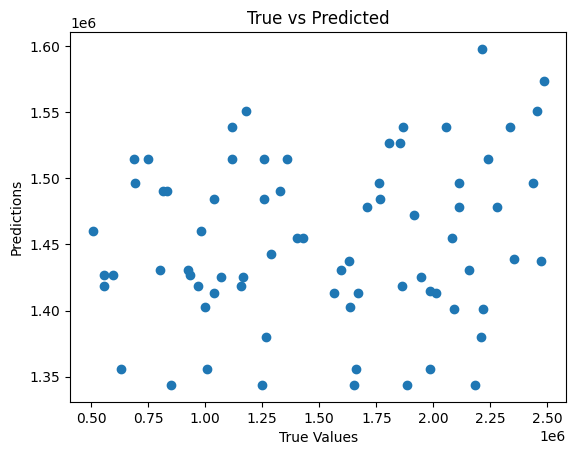

In [66]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values for regression
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted")
plt.show()
